# Transform Learning

In [27]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
import pathlib
import PIL

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

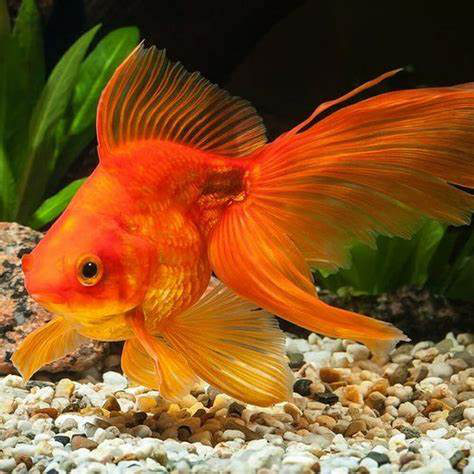

In [4]:
Image.open("goldfish.jpg")

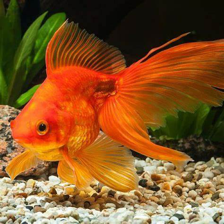

In [5]:
##resize

goldfish= Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
goldfish

In [6]:
#Normalize images

goldfish = np.array(goldfish)/255.0
goldfish.shape

(224, 224, 3)

In [7]:
goldfish

array([[[0.18823529, 0.21960784, 0.04313725],
        [0.16862745, 0.19215686, 0.04313725],
        [0.15294118, 0.16078431, 0.05490196],
        ...,
        [0.04705882, 0.04705882, 0.00784314],
        [0.04705882, 0.04705882, 0.00784314],
        [0.04705882, 0.04705882, 0.00784314]],

       [[0.19607843, 0.22352941, 0.03921569],
        [0.17647059, 0.2       , 0.04313725],
        [0.16470588, 0.17254902, 0.0627451 ],
        ...,
        [0.04705882, 0.04705882, 0.00784314],
        [0.04705882, 0.04705882, 0.00784314],
        [0.04705882, 0.04705882, 0.00784314]],

       [[0.20392157, 0.22745098, 0.03529412],
        [0.19215686, 0.20784314, 0.04313725],
        [0.18039216, 0.18823529, 0.06666667],
        ...,
        [0.04705882, 0.04705882, 0.00784314],
        [0.04705882, 0.04705882, 0.00784314],
        [0.04705882, 0.04705882, 0.00784314]],

       ...,

       [[0.52941176, 0.52156863, 0.43921569],
        [0.48235294, 0.4745098 , 0.38823529],
        [0.43529412, 0

In [8]:
# As prediction accespts (m, n_h, n_w, f) hape images, where m is training example , lets chnage hape
goldfish[np.newaxis,].shape

(1, 224, 224, 3)

In [10]:
result = classifier.predict(goldfish[np.newaxis,])
result

1/1 [==============================] - 0s 45ms/step


array([[ 0.28258327,  1.8784941 ,  9.965286  , ..., -1.432069  ,
        -0.7141879 , -0.9137667 ]], dtype=float32)

In [11]:
result.shape

(1, 1001)

In [12]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [18]:
result[0][2]

9.965286

In [19]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()

image_labels[:10]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

In [20]:
image_labels[predicted_label_index]

'goldfish'

In [22]:
#work on flower data
data_dir = '.\\datasets\\flower_photos'

In [23]:
data_dir =pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [24]:
#create dictinary for flower imagess path

flower_images_dict = {
    'roses': list(data_dir.glob('roses/*')) ,
    'daisy':list(data_dir.glob('daisy/*')) ,
    'dandelion':list(data_dir.glob('dandelion/*')) ,
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))}

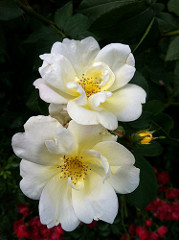

In [32]:
PIL.Image.open(str(flower_images_dict["roses"][0]))

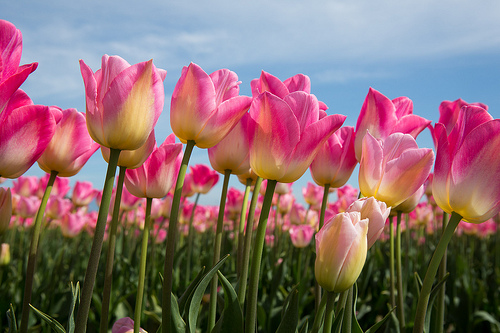

In [35]:
PIL.Image.open(str(flower_images_dict["tulips"][3]))

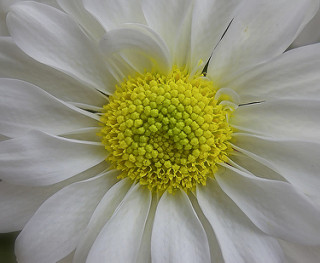

In [34]:
PIL.Image.open(str(flower_images_dict["daisy"][0]))

In [36]:
#create lables for these

flower_labels_dict = {
    'roses': 0 ,
    'daisy': 1 ,
    'dandelion':2 ,
    'sunflowers': 3,
    'tulips': 4}


In [46]:
#rread using cv2, to get arryas of the mages

rose_img = cv2.imread(str(flower_images_dict["roses"][0]))
rose_img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [48]:
rose_img.shape

(240, 179, 3)

In [49]:
rose_img_2 = cv2.imread(str(flower_images_dict["roses"][1]))
rose_img_2.shape

(240, 320, 3)

In [42]:
daisy_img = cv2.imread(str(flower_images_dict["daisy"][0]))
daisy_img

array([[[133, 135, 135],
        [136, 138, 138],
        [142, 142, 142],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[132, 134, 134],
        [135, 137, 137],
        [139, 141, 141],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[131, 133, 133],
        [134, 136, 136],
        [139, 141, 141],
        ...,
        [153, 153, 153],
        [155, 155, 155],
        [146, 146, 146]],

       ...,

       [[ 27,  48,  45],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [125, 126, 130],
        [125, 126, 130],
        [124, 125, 129]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [125, 126, 130],
        [125, 126, 130],
        [125, 126, 130]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [127, 128, 132],
        [127, 128, 132],
        [127, 128, 132]]

In [43]:
daisy_img.shape

(263, 320, 3)

In [50]:
# as images size is not unique, so we need to reshape

cv2.resize(rose_img, IMAGE_SHAPE).shape

(224, 224, 3)

In [52]:
# apply to this whole dict/images

X, y = [], []

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [54]:
X[0].shape

(224, 224, 3)

In [57]:
#Lets conver to np.asrrayw

X = np.array(X)
y = np.array(y)

In [58]:
##train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [59]:
#lets normalize the arrays 
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [60]:
#Lets check shape of the data set before implement
print("Shape of X_train_scaled", X_train_scaled.shape)
print("Shape of X_test_scaled", X_test_scaled.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train_scaled (2752, 224, 224, 3)
Shape of X_test_scaled (918, 224, 224, 3)
Shape of y_train (2752,)
Shape of y_test (918,)


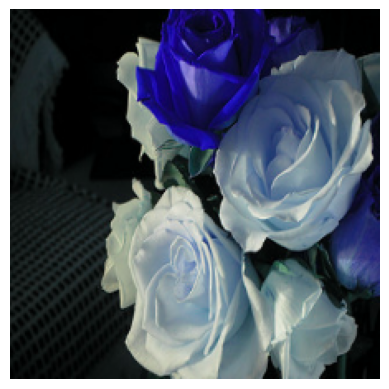

In [61]:
plt.axis('off')
plt.imshow(X[1])

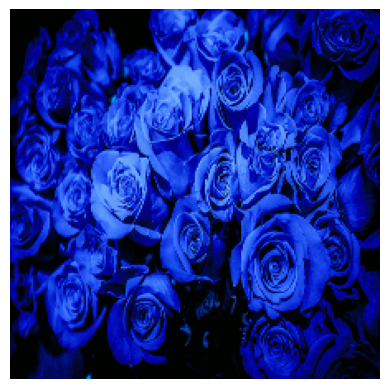

In [62]:
plt.axis('off')
plt.imshow(X[2])

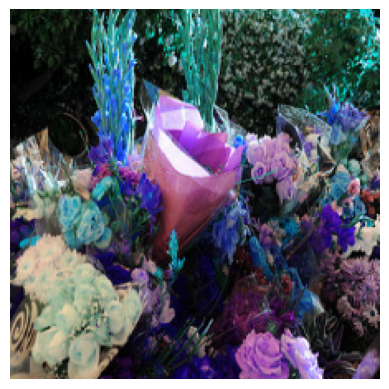

In [63]:
plt.axis('off')
plt.imshow(X[3])

In [67]:
# lets use pretrainede model 
predicted = classifier.predict(np.array([X[1], X[2], X[3]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([880, 795, 795], dtype=int64)

In [68]:
#if we cross check above prediction from lables
image_labels[880]

'umbrella'

In [70]:
image_labels[795]

'shower curtain'

we are getting wrong predictions, ready made model having daisy flower not all

# Now we use feature extraction model and retarin it by changing last layer



In [71]:

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [72]:
num_flower =5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_flower)#we are adding last layer 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [74]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 65s 699ms/step - loss: 0.7440 - acc: 0.7366
Epoch 2/5
86/86 [==============================] - 59s 682ms/step - loss: 0.3922 - acc: 0.8652
Epoch 3/5
86/86 [==============================] - 59s 688ms/step - loss: 0.3118 - acc: 0.9026
Epoch 4/5
86/86 [==============================] - 59s 686ms/step - loss: 0.2574 - acc: 0.9226
Epoch 5/5
86/86 [==============================] - 65s 753ms/step - loss: 0.2225 - acc: 0.9342


In [75]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 22s 722ms/step - loss: 0.3715 - acc: 0.8715


[0.37146973609924316, 0.8714597225189209]

Here , it shows, within 5 epochs we gett good accuracy and evaluavated with less overfit compared to deep learning CNN models, here take comptatiional time is less and gives good accuracy too.